In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
filepath = r'C:\Users\ASUS\Downloads\Bitter_Gourd_Data.csv'
macro_data = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')
print(macro_data.shape)  # (123, 8)
macro_data.head()

(1144, 5)


,Average_Price,Holiday,Maximum Temperature(Avg),Minimum Temperature(Avg),Daily Precipitation
Date,,,,,
2018-01-01,57.5,0,20.0,3.8,0.0
2018-01-02,57.5,0,19.8,6.3,0.0
2018-01-03,57.5,0,18.5,3.3,0.0
2018-01-04,57.5,0,18.0,2.2,0.0
2018-01-05,62.5,0,19.5,1.5,0.0


In [3]:
bx=macro_data.resample('W-Mon').mean()

bx.head(50)

,Average_Price,Holiday,Maximum Temperature(Avg),Minimum Temperature(Avg),Daily Precipitation
Date,,,,,
2018-01-01,57.500000,0.000000,20.000000,3.800000,0.000000
2018-01-08,61.785714,0.000000,18.271429,2.357143,0.000000
2018-01-15,84.083333,0.166667,17.533333,1.366667,0.000000
2018-01-22,105.714286,0.142857,19.757143,4.442857,0.000000
2018-01-29,104.642857,0.000000,18.385714,4.014286,0.871429
2018-02-05,107.857143,0.142857,19.100000,4.685714,0.000000
2018-02-12,105.000000,0.000000,23.600000,4.000000,0.000000
2018-02-19,NaN,NaN,NaN,NaN,NaN
2018-02-26,NaN,NaN,NaN,NaN,NaN


In [4]:
bx['Average_Price'].fillna( method ='ffill', inplace = True )
bx['Holiday'].fillna( method ='ffill', inplace = True )
bx['Maximum Temperature(Avg)'].fillna( method ='ffill', inplace = True )
bx['Minimum Temperature(Avg)'].fillna( method ='ffill', inplace = True )
bx['Daily Precipitation'].fillna( method ='ffill', inplace = True )
bx.head(50)

,Average_Price,Holiday,Maximum Temperature(Avg),Minimum Temperature(Avg),Daily Precipitation
Date,,,,,
2018-01-01,57.500000,0.000000,20.000000,3.800000,0.000000
2018-01-08,61.785714,0.000000,18.271429,2.357143,0.000000
2018-01-15,84.083333,0.166667,17.533333,1.366667,0.000000
2018-01-22,105.714286,0.142857,19.757143,4.442857,0.000000
2018-01-29,104.642857,0.000000,18.385714,4.014286,0.871429
2018-02-05,107.857143,0.142857,19.100000,4.685714,0.000000
2018-02-12,105.000000,0.000000,23.600000,4.000000,0.000000
2018-02-19,105.000000,0.000000,23.600000,4.000000,0.000000
2018-02-26,105.000000,0.000000,23.600000,4.000000,0.000000


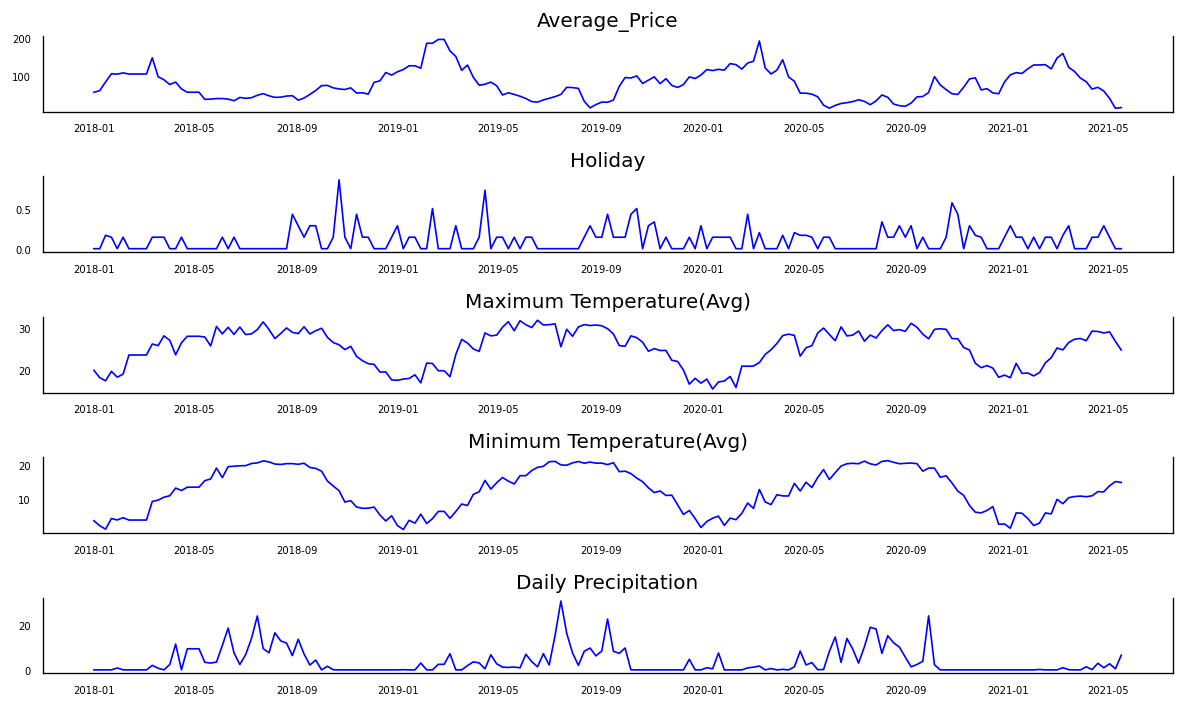

In [5]:
fig, axes = plt.subplots(nrows=5, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = bx[bx.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # Decorations
    ax.set_title(bx.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [6]:
ad_fuller_result_1 = adfuller(macro_data['Average_Price'])#.diff()[1:])
print('Average_Price')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')



print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['Maximum Temperature(Avg)'])#.diff()[1:])

print('Maximum Temperature(Avg)')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

Average_Price
ADF Statistic: -3.5485096236357028
p-value: 0.006825239916918204

---------------------

Maximum Temperature(Avg)
ADF Statistic: -2.9251239499638944
p-value: 0.042503459265250634


In [7]:
print('Maximum Temperature causes Average_Price?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['Average_Price', 'Maximum Temperature(Avg)']], 4)

print('\ Average_Price causes Maximum Temperature?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['Maximum Temperature(Avg)', 'Average_Price']], 4)

Maximum Temperature causes Average_Price?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=25.3386 , p=0.0000  , df_denom=1140, df_num=1
ssr based chi2 test:   chi2=25.4052 , p=0.0000  , df=1
likelihood ratio test: chi2=25.1270 , p=0.0000  , df=1
parameter F test:         F=25.3386 , p=0.0000  , df_denom=1140, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=12.6887 , p=0.0000  , df_denom=1137, df_num=2
ssr based chi2 test:   chi2=25.4890 , p=0.0000  , df=2
likelihood ratio test: chi2=25.2087 , p=0.0000  , df=2
parameter F test:         F=12.6887 , p=0.0000  , df_denom=1137, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.8371  , p=0.0000  , df_denom=1134, df_num=3
ssr based chi2 test:   chi2=26.6748 , p=0.0000  , df=3
likelihood ratio test: chi2=26.3678 , p=0.0000  , df=3
parameter F test:         F=8.8371  , p=0.0000  , df_denom=1134, df_num=3

Granger Causality
number 

In [8]:
bx= bx[['Maximum Temperature(Avg)','Average_Price']]
print(bx.shape)

(177, 2)


In [9]:
train_df=bx[:-12]
test_df=bx[-12:]

In [10]:
print(test_df.shape)

(12, 2)


In [11]:
model = VAR(train_df)

In [12]:
sorted_order=model.select_order(maxlags=12)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        9.702       9.742   1.635e+04       9.718
1        6.594      6.713*       730.9      6.643*
2        6.590       6.788       727.9       6.671
3        6.633       6.910       759.5       6.745
4        6.669       7.025       787.8       6.814
5        6.647       7.082       770.7       6.824
6        6.629       7.144       757.5       6.838
7        6.585       7.179       725.1       6.826
8        6.595       7.268       732.6       6.868
9       6.565*       7.317      711.3*       6.870
10       6.581       7.413       723.7       6.919
11       6.618       7.529       752.0       6.988
12       6.635       7.625       765.8       7.037
--------------------------------------------------


In [13]:
var_model = VARMAX(train_df, order=(9,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                         Statespace Model Results                                        
Dep. Variable:     ['Maximum Temperature(Avg)', 'Average_Price']   No. Observations:                  165
Model:                                                    VAR(9)   Log Likelihood                -978.298
                                                     + intercept   AIC                           2038.597
Date:                                           Thu, 10 Mar 2022   BIC                           2165.941
Time:                                                   18:04:51   HQIC                          2090.290
Sample:                                               01-01-2018                                         
                                                    - 02-22-2021                                         
Covariance Type:                                             opg                                         
Ljung-Box (L1) (Q):             0.26, 0.01   J

In [14]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="2018-01-01",end='2021-01-01')

predictions=predict.predicted_mean

In [15]:
predictions.columns=['Maximum Temperature(Avg)_predicted','Average_Price_predicted']
predictions

,Maximum Temperature(Avg)_predicted,Average_Price_predicted
2021-03-01,22.648964,117.518749
2021-03-08,23.671162,106.608785
2021-03-15,23.901341,109.222372
2021-03-22,24.977416,106.788847
2021-03-29,25.491296,103.784094
2021-04-05,26.143979,95.684310
2021-04-12,26.478671,86.047227
2021-04-19,27.019645,78.696796
2021-04-26,27.145274,75.414349
2021-05-03,27.646655,70.436237


In [16]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)
test_vs_pred=pd.concat([bx['Average_Price'], test_vs_pred],axis=1)
test_vs_pred.head()


,Average_Price,Maximum Temperature(Avg),Average_Price,Maximum Temperature(Avg)_predicted,Average_Price_predicted
2018-01-01,57.500000,NaN,NaN,NaN,NaN
2018-01-08,61.785714,NaN,NaN,NaN,NaN
2018-01-15,84.083333,NaN,NaN,NaN,NaN
2018-01-22,105.714286,NaN,NaN,NaN,NaN
2018-01-29,104.642857,NaN,NaN,NaN,NaN


In [17]:
test_vs_pred.drop(['Maximum Temperature(Avg)','Maximum Temperature(Avg)_predicted'], axis='columns', inplace=True)

Text(0.5, 1.0, 'Forecasting of Bitter Gourd using VAR model')

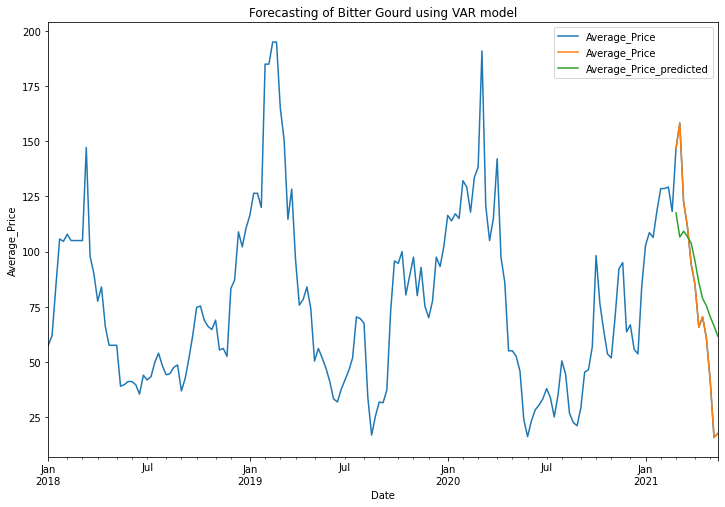

In [25]:
test_vs_pred.plot(figsize=(12,8), xlabel='Date' , ylabel='Average_Price').set_title("Forecasting of Bitter Gourd using VAR model")


In [19]:
from sklearn.metrics import mean_absolute_error
import math 
from statistics import mean


mae_Average_Price=math.sqrt(mean_absolute_error(predictions['Average_Price_predicted'],test_df['Average_Price']))
print('Mean value of Average_Price is : {}.Mean Absolute Error is :{}'.format(mean(test_df['Average_Price']),mae_Average_Price))

Mean value of Average_Price is : 82.4702380952381.Mean Absolute Error is :4.882760476985309


In [20]:
import statsmodels
import pickle
print('statsmodels: %s' % statsmodels.__version__)


statsmodels: 0.13.2


In [21]:
pickle.dump(model, open(r'C:\Users\ASUS\OneDrive\Desktop\New folder\Bitter Gourd_VAR_model.pkl', "wb"))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ASUS\\OneDrive\\Desktop\\New folder\\Bitter Gourd_VAR_model.pkl'

In [ ]:
loaded = pickle.load(open(r'C:\Users\ASUS\OneDrive\Desktop\New folder\Bitter Gourd_VAR_model.pkl', "rb"))

In [ ]:
var_model = VARMAX(train_df, order=(9,0),enforce_stationarity= True)
loaded = var_model.fit(disp=False)
predict2 = loaded.predict(start=len(train_df),end=len(train_df) + n_forecast-1)#start="2018-01-01",end='2021-01-01')

NameError: name 'predict2' is not defined

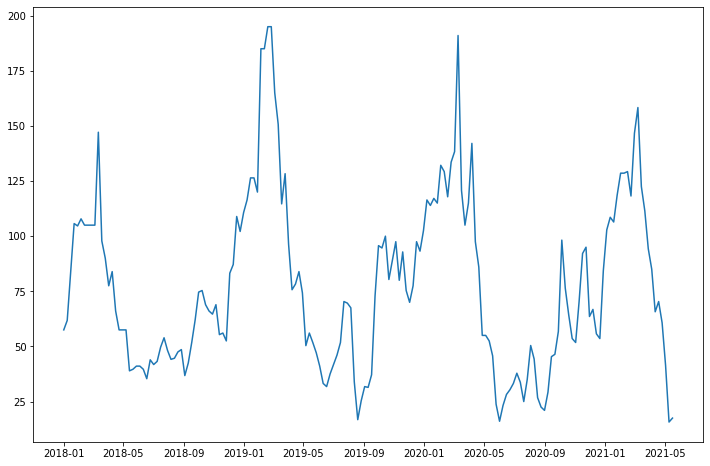

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(bx['Average_Price'], label='Training Data')
plt.plot(predict2['Average_Price'], label='Prediction')
plt.legend()